In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread


Image shape: (1080, 1440)
Image dtype: uint8
Max pixel value: 253


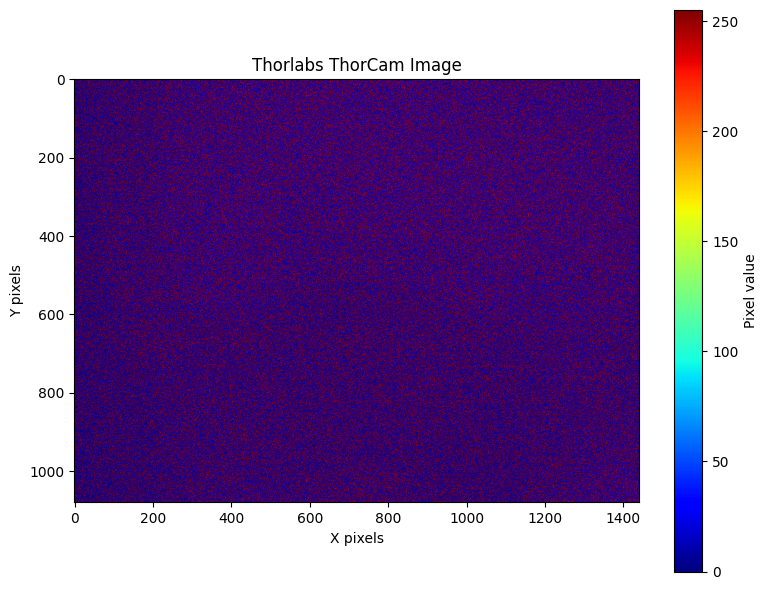

In [ ]:

# --- Load image ---
image_path = "image_155709.tif"  # <-- change to your file name
image_path2 = "image_155722.tif" 
image = imread(image_path)
image2 = imread(image_path2)



# --- Display basic info ---
print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")
print(f"Max pixel value: {np.max(image-image2)}") #trying to figure out if there's duplicate pictures being displayed. 

# --- Plot the image ---
plt.figure(figsize=(8, 6))
plt.imshow(image-image2, cmap='jet', vmin=0, vmax=np.max(image))  # use full dynamic range
plt.title("Thorlabs ThorCam Image")
plt.xlabel("X pixels")
plt.ylabel("Y pixels")
plt.colorbar(label="Pixel value")
plt.tight_layout()
plt.show()

Atom number: 202076.2456193814
ROI shape: (400, 400)
Signal sum in ROI: 6631132
Mean pixel value in ROI: 41.44
Max pixel value in ROI: 886


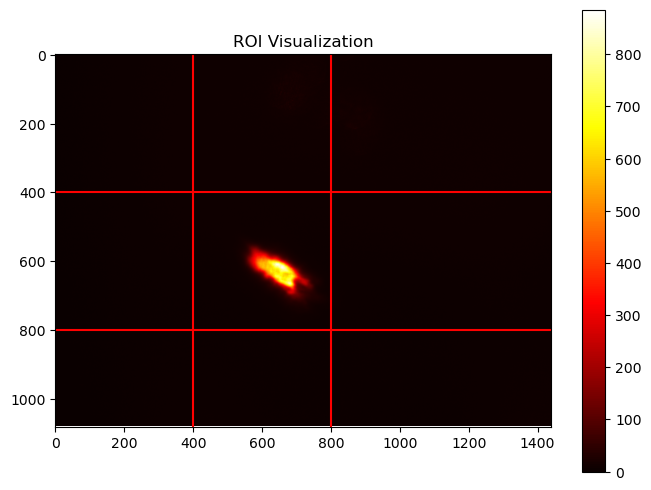

In [21]:

# --- Define ROI ---
# Format: [y_start:y_end, x_start:x_end]
x0, x1 = 400, 800  # columns
y0, y1 = 400, 800  # rows
roi = image[y0:y1, x0:x1]

# --- Analysis ---
signal_sum = np.sum(roi)
mean_value = np.mean(roi)
max_value = np.max(roi)

C = 65.63*10**3
exp_time = 500*10**(-6)

atom_number = signal_sum/(C*exp_time)

print(f"Atom number: {atom_number}")
print(f"ROI shape: {roi.shape}")
print(f"Signal sum in ROI: {signal_sum}")
print(f"Mean pixel value in ROI: {mean_value:.2f}")
print(f"Max pixel value in ROI: {max_value}")

# --- Optional: visualize ---
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='hot', vmin=0, vmax=np.max(image))
plt.colorbar()
plt.axvline(x=x0, color='red')
plt.axvline(x=x1, color='red')
plt.axhline(y=y0, color='red')
plt.axhline(y=y1, color='red')
plt.title("ROI Visualization")
plt.show()
